<a href="https://colab.research.google.com/github/Aditya12D/LR-from-scratch/blob/main/simplelinearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression Implementation

In this notebook:

- We implement **Simple Linear Regression from scratch (without sklearn)**.
- Compare it with **sklearn's LinearRegression**.
- Visualise results with **matplotlib**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

code implementation from scratch

In [2]:
class scratchLR:
  def __init__(self):
    self.m=0
    self.b=0
  def train(self,X_train,y_train):
    X_train=np.array(X_train)
    y_train=np.array(y_train)
    num=0
    den=0
    for i in range(len(X_train)):
      num+=(X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
      den+=(X_train[i]-X_train.mean())**2
    self.m=num/den
    self.b=y_train.mean()-(self.m*X_train.mean())
    return
  def predict(self,X_test):
    X_test=np.array(X_test)
    return self.m*X_test+self.b

data preprocessing and feature selection

In [3]:
df=pd.read_csv('/content/Study_vs_Score_data.csv')
print(df.columns)
df.info()

Index(['Attendance_Hours', 'Final_Marks'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Attendance_Hours  1000 non-null   float64
 1   Final_Marks       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [4]:
X=df['Attendance_Hours']
y=df['Final_Marks']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

traing our model

In [6]:
model=scratchLR()
model.train(X_train,y_train)
y_pred=model.predict(X_test)

training inbuilt model

In [7]:
X_train = X_train.to_frame()
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test.to_frame())

#visualization

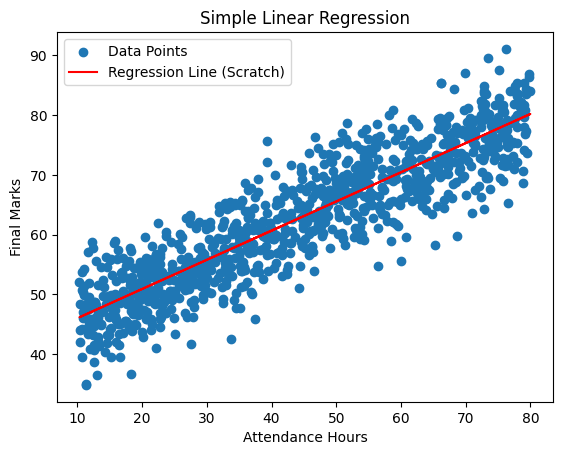

In [9]:
plt.scatter(X, y, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line (Scratch)')
plt.xlabel('Attendance Hours')
plt.ylabel('Final Marks')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


#comparing

In [12]:
print(f"made from scratch slope:{model.m} and intercept:{model.b}")
print(f"sklearn slope:{model2.coef_[0]} and intercept:{model2.intercept_}")

made from scratch slope:0.48807278771762197 and intercept:41.14816656995235
sklearn slope:0.48807278771762236 and intercept:41.14816656995234
